In [1]:
import os
import glob
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nltools.file_reader import onsets_to_dm
from nltools.stats import regress, zscore
from nltools.data import Brain_Data, Design_Matrix
from nilearn import image, masking
from nilearn.plotting import view_img, glass_brain, plot_stat_map, plot_roi
from nilearn.image import index_img

In [2]:
# cell do define all the paths 
data_dir = "C:/fmridata/bold/"
smooth_dir = "C:/fmridata/smooth/"
mask_dir = "C:/fmridata/"
event_dir = "C:/fmridata/events-fmri/"
contrasts_amygdala_dir = "C:/fmridata/contrasts/"
# contrasts_amygdala_dir = "C:/Users/Asus/Desktop/fmri/contrasts/"

In [3]:
# everything that need to be defined before the loop 

# parameters
tr = 2.0 #is set according to value found in the amsterdam dataset overview
fwhm=8 #parameter defining extend of smoothing

# initialize empty df to save RTs per ppt 
rt_df = pd.DataFrame()

In [4]:
# MASK DATA 
#load in mask received from fsleyes based on one of our brains
#should work for all of them since they are aligned to the same template
amygdala_left = "harvardoxford-subcortical_prob_Left-Amygdala.nii"
amygdala_left_path = mask_dir+amygdala_left
amygdala_left_img = image.load_img(amygdala_left_path)
amygdala_right = "harvardoxford-subcortical_prob_Right-Amygdala.nii"
amygdala_right_path = mask_dir+amygdala_right
amygdala_right_img = image.load_img(amygdala_right_path)

# Get the mask data
amygdala_left_data = amygdala_left_img.get_fdata()
amygdala_right_data = amygdala_right_img.get_fdata()
# Combine the left and right amygdala masks using logical OR
mask_data = np.logical_or(amygdala_left_data, amygdala_right_data)

# Apply a threshold to create a binary mask
threshold_value = 0.0  # Adjust this value based on your mask data
binary_mask_data = (mask_data > threshold_value).astype(np.int)
print(len(binary_mask_data))

# Create a new NIfTI image for the binary mask
binary_mask_img = nib.Nifti1Image(binary_mask_data, affine=amygdala_right_img.affine)


91


C:\Users\rache\AppData\Local\Temp\ipykernel_24316\2108849390.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_mask_data = (mask_data > threshold_value).astype(np.int)


0184
C:/fmridata/bold\sub-0184_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0184_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0190,0.5,incongruent,male,female,0.6370,left,correct
1,5.5356,0.5,congruent,male,male,0.5263,left,correct
2,11.0522,0.5,incongruent,female,male,0.4796,right,correct
3,16.5688,0.5,congruent,female,female,0.4679,right,correct
4,21.0854,0.5,incongruent,female,male,0.6302,right,correct
...,...,...,...,...,...,...,...,...
91,454.5293,0.5,congruent,female,female,0.3754,right,correct
92,459.5459,0.5,congruent,male,male,0.4556,left,correct
93,464.0625,0.5,congruent,male,male,0.3590,left,correct
94,468.5791,0.5,incongruent,male,female,0.3343,left,correct


     trial_type  response_time
0   incongruent         0.6370
1     congruent         0.5263
2   incongruent         0.4796
3     congruent         0.4679
4   incongruent         0.6302
..          ...            ...
91    congruent         0.3754
92    congruent         0.4556
93    congruent         0.3590
94  incongruent         0.3343
95  incongruent         0.4726

[93 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0185
C:/fmridata/bold\sub-0185_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0185_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0348,0.5,incongruent,male,female,NaN,NaN,miss
1,5.5763,0.5,incongruent,female,male,NaN,NaN,miss
2,11.6011,0.5,congruent,male,male,0.6094,left,correct
3,16.1176,0.5,incongruent,female,male,0.5058,right,correct
4,22.1341,0.5,congruent,female,female,0.9440,right,correct
...,...,...,...,...,...,...,...,...
91,456.7538,0.5,congruent,male,male,0.6198,left,correct
92,461.2703,0.5,incongruent,male,female,1.0751,left,correct
93,465.7868,0.5,incongruent,female,male,0.6914,right,correct
94,470.3033,0.5,congruent,female,female,0.6068,right,correct


     trial_type  response_time
2     congruent         0.6094
3   incongruent         0.5058
4     congruent         0.9440
5     congruent         0.4893
6   incongruent         0.8099
..          ...            ...
91    congruent         0.6198
92  incongruent         1.0751
93  incongruent         0.6914
94    congruent         0.6068
95    congruent         0.6101

[93 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0186
C:/fmridata/bold\sub-0186_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0186_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0223,0.5,incongruent,female,male,0.8706,right,correct
1,5.5389,0.5,incongruent,male,female,0.5589,left,correct
2,10.5555,0.5,congruent,male,male,0.4582,left,correct
3,17.0720,0.5,congruent,male,male,0.3945,left,correct
4,22.0886,0.5,congruent,female,female,0.4508,right,correct
...,...,...,...,...,...,...,...,...
91,456.5301,0.5,congruent,female,female,0.4278,right,correct
92,461.0467,0.5,congruent,female,female,0.3901,right,correct
93,465.5632,0.5,congruent,female,female,0.4325,right,correct
94,470.0798,0.5,incongruent,male,female,0.4398,left,correct


     trial_type  response_time
0   incongruent         0.8706
1   incongruent         0.5589
2     congruent         0.4582
3     congruent         0.3945
4     congruent         0.4508
..          ...            ...
91    congruent         0.4278
92    congruent         0.3901
93    congruent         0.4325
94  incongruent         0.4398
95  incongruent         0.4471

[88 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0187

0188

0189

0190
C:/fmridata/bold\sub-0190_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0190_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0237,0.5,incongruent,male,female,NaN,NaN,miss
1,5.5402,0.5,incongruent,male,female,0.6295,left,correct
2,10.5567,0.5,incongruent,male,female,0.3849,left,correct
3,15.5733,0.5,congruent,male,male,0.3971,left,correct
4,22.0897,0.5,congruent,female,female,0.3505,right,correct
...,...,...,...,...,...,...,...,...
91,455.0273,0.5,congruent,male,male,0.3757,left,correct
92,459.5439,0.5,congruent,male,male,0.3130,left,correct
93,464.5604,0.5,incongruent,female,male,0.2813,left,incorrect
94,469.5769,0.5,incongruent,male,female,0.4396,left,correct


     trial_type  response_time
1   incongruent         0.6295
2   incongruent         0.3849
3     congruent         0.3971
4     congruent         0.3505
5     congruent         0.3977
..          ...            ...
90  incongruent         0.3904
91    congruent         0.3757
92    congruent         0.3130
94  incongruent         0.4396
95    congruent         0.5049

[91 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0191
C:/fmridata/bold\sub-0191_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0191_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0199,0.5,congruent,female,female,0.5660,left,incorrect
1,6.5364,0.5,incongruent,female,male,NaN,NaN,miss
2,13.0529,0.5,incongruent,male,female,0.8606,left,correct
3,18.0694,0.5,congruent,female,female,0.5449,right,correct
4,23.0860,0.5,incongruent,female,male,0.6791,right,correct
...,...,...,...,...,...,...,...,...
91,455.5237,0.5,incongruent,male,female,0.5532,left,correct
92,460.0402,0.5,congruent,male,male,0.5046,left,correct
93,465.5567,0.5,congruent,male,male,0.4549,left,correct
94,470.5733,0.5,incongruent,male,female,0.4681,left,correct


     trial_type  response_time
2   incongruent         0.8606
3     congruent         0.5449
4   incongruent         0.6791
5   incongruent         0.7844
6     congruent         0.6887
..          ...            ...
91  incongruent         0.5532
92    congruent         0.5046
93    congruent         0.4549
94  incongruent         0.4681
95  incongruent         0.5775

[90 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216
4      191          0.522098        0.512753  0.009344


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0192

0193

0194
C:/fmridata/bold\sub-0194_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0194_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0228,0.5,incongruent,male,female,1.0631,left,correct
1,7.0393,0.5,congruent,male,male,0.3785,left,correct
2,11.5558,0.5,congruent,female,female,0.3788,right,correct
3,16.5724,0.5,congruent,female,female,0.4430,right,correct
4,21.0889,0.5,incongruent,female,male,0.3644,left,incorrect
...,...,...,...,...,...,...,...,...
91,456.5265,0.5,congruent,female,female,0.5565,right,correct
92,461.0430,0.5,incongruent,male,female,0.5898,left,correct
93,466.0595,0.5,congruent,female,female,0.4791,right,correct
94,470.5761,0.5,incongruent,male,female,0.5524,left,correct


     trial_type  response_time
0   incongruent         1.0631
1     congruent         0.3785
2     congruent         0.3788
3     congruent         0.4430
5   incongruent         0.6727
..          ...            ...
91    congruent         0.5565
92  incongruent         0.5898
93    congruent         0.4791
94  incongruent         0.5524
95  incongruent         0.5737

[93 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216
4      191          0.522098        0.512753  0.009344
5      194          0.513554        0.475540  0.038014


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0195
C:/fmridata/bold\sub-0195_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0195_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0192,0.5,incongruent,female,male,0.7038,right,correct
1,6.0358,0.5,congruent,female,female,0.5110,right,correct
2,10.5524,0.5,incongruent,female,male,0.5103,right,correct
3,15.0689,0.5,incongruent,female,male,0.4747,right,correct
4,19.5855,0.5,congruent,male,male,0.3739,left,correct
...,...,...,...,...,...,...,...,...
91,456.5258,0.5,congruent,female,female,0.5578,right,correct
92,461.0424,0.5,incongruent,male,female,0.6021,left,correct
93,465.5589,0.5,congruent,male,male,0.5994,left,correct
94,470.5755,0.5,incongruent,female,male,0.7907,right,correct


     trial_type  response_time
0   incongruent         0.7038
1     congruent         0.5110
2   incongruent         0.5103
3   incongruent         0.4747
4     congruent         0.3739
..          ...            ...
91    congruent         0.5578
92  incongruent         0.6021
93    congruent         0.5994
94  incongruent         0.7907
95  incongruent         0.7171

[94 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216
4      191          0.522098        0.512753  0.009344
5      194          0.513554        0.475540  0.038014
6      195          0.590447        0.530711  0.059736


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0196

0197

0198

0199

0200

0201
C:/fmridata/bold\sub-0201_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0201_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0227,0.5,congruent,male,male,0.7222,left,correct
1,5.5393,0.5,incongruent,female,male,0.6405,right,correct
2,10.0558,0.5,congruent,male,male,0.4118,left,correct
3,15.0724,0.5,incongruent,male,female,0.5051,left,correct
4,19.5889,0.5,incongruent,female,male,0.6644,right,correct
...,...,...,...,...,...,...,...,...
91,453.5277,0.5,incongruent,male,female,0.5746,left,correct
92,458.0442,0.5,congruent,female,female,0.5850,right,correct
93,463.0607,0.5,congruent,male,male,0.4233,left,correct
94,468.0773,0.5,congruent,male,male,0.6545,left,correct


     trial_type  response_time
0     congruent         0.7222
1   incongruent         0.6405
2     congruent         0.4118
3   incongruent         0.5051
4   incongruent         0.6644
..          ...            ...
91  incongruent         0.5746
92    congruent         0.5850
93    congruent         0.4233
94    congruent         0.6545
95  incongruent         0.5299

[91 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216
4      191          0.522098        0.512753  0.009344
5      194          0.513554        0.475540  0.038014
6      195          0.590447        0.530711  0.059736
7      201          0.531009        0.512593  0.018415


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0202
C:/fmridata/bold\sub-0202_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0202_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0222,0.5,incongruent,female,male,NaN,NaN,miss
1,6.5388,0.5,incongruent,male,female,0.3120,right,incorrect
2,11.0554,0.5,congruent,male,male,0.4933,right,incorrect
3,17.5719,0.5,congruent,female,female,0.4976,left,incorrect
4,22.0885,0.5,congruent,female,female,0.4400,right,correct
...,...,...,...,...,...,...,...,...
91,453.5312,0.5,incongruent,female,male,0.4212,left,incorrect
92,458.0478,0.5,congruent,male,male,0.5535,right,incorrect
93,464.5643,0.5,congruent,female,female,0.4689,left,incorrect
94,469.0809,0.5,incongruent,male,female,0.3742,right,incorrect


     trial_type  response_time
4     congruent         0.4400
8   incongruent         0.4532
9   incongruent         0.5605
15  incongruent         0.3653
16  incongruent         0.3406
24    congruent         0.4200
53    congruent         0.4357
72    congruent         0.4795
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216
4      191          0.522098        0.512753  0.009344
5      194          0.513554        0.475540  0.038014
6      195          0.590447        0.530711  0.059736
7      201          0.531009        0.512593  0.018415
8      202          0.429900        0.443800 -0.013900


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0203

0204

0205

0206

0207

0208

0209
C:/fmridata/bold\sub-0209_task-gstroop_acq-seq_space-MNI152NLin2009cAsym_desc-preproc_bold.nii
in loop
(65, 77, 60, 245)
C:/fmridata/events-fmri\sub-0209_task-gstroop_acq-seq_events.tsv


C:\Users\rache\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


,onset,duration,trial_type,img_gender,word_gender,response_time,response_hand,response_accuracy
0,1.0196,0.5,congruent,male,male,0.6493,left,correct
1,6.5362,0.5,congruent,male,male,0.7385,left,correct
2,11.0527,0.5,incongruent,female,male,0.5149,right,correct
3,16.0693,0.5,congruent,male,male,0.4221,left,correct
4,21.0858,0.5,congruent,female,female,0.3495,right,correct
...,...,...,...,...,...,...,...,...
91,454.5245,0.5,incongruent,female,male,0.6808,right,correct
92,459.0410,0.5,incongruent,male,female,0.7341,left,correct
93,463.5576,0.5,congruent,male,male,0.4423,left,correct
94,468.5741,0.5,congruent,female,female,0.4307,right,correct


     trial_type  response_time
0     congruent         0.6493
1     congruent         0.7385
2   incongruent         0.5149
3     congruent         0.4221
4     congruent         0.3495
..          ...            ...
91  incongruent         0.6808
92  incongruent         0.7341
93    congruent         0.4423
94    congruent         0.4307
95    congruent         0.7240

[94 rows x 2 columns]
   subject  mean_incongruent  mean_congruent  contrast
0      184          0.457631        0.456602  0.001029
1      185          0.860536        0.744133  0.116402
2      186          0.527957        0.471025  0.056932
3      190          0.441686        0.406470  0.035216
4      191          0.522098        0.512753  0.009344
5      194          0.513554        0.475540  0.038014
6      195          0.590447        0.530711  0.059736
7      201          0.531009        0.512593  0.018415
8      202          0.429900        0.443800 -0.013900
9      209          0.532353        0.506302  0.026051


C:\Users\rache\anaconda3\lib\site-packages\nltools\file_reader.py:79: UserWarning: Only 2 columns in file, assuming all stimuli are the same duration
  warnings.warn(


[-1.  1.  0.]
gelukt! :)
0210

0211

0212

0213

0214

0215

0216



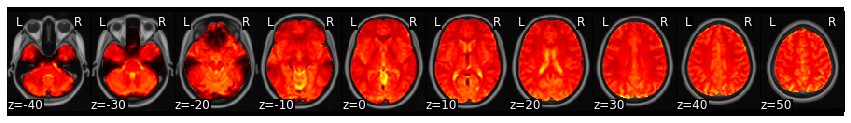

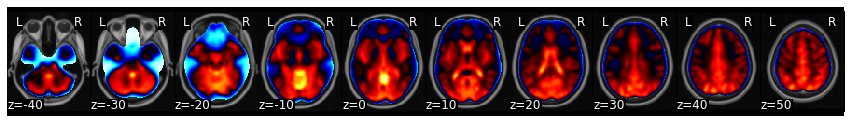

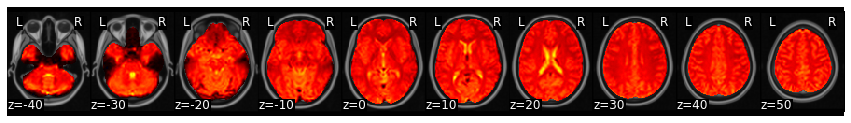

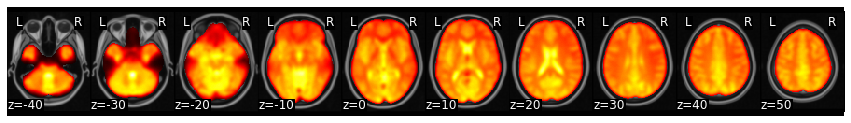

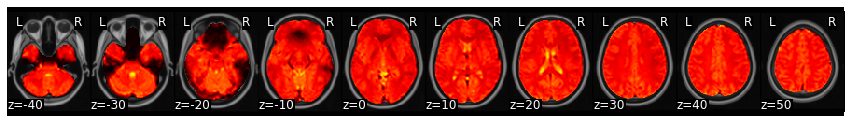

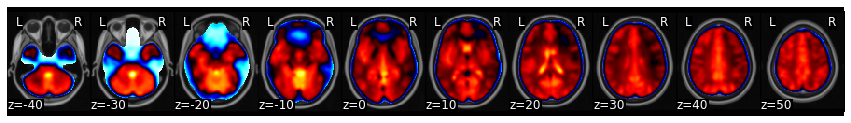

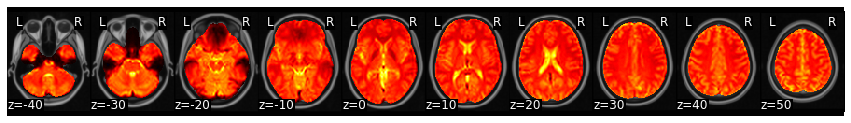

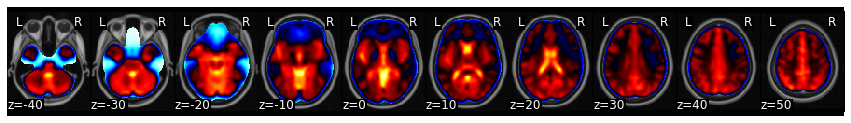

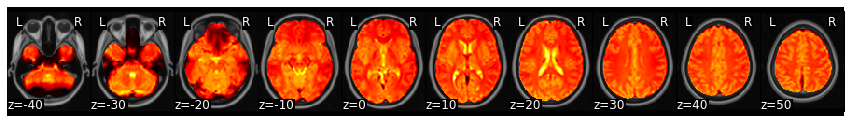

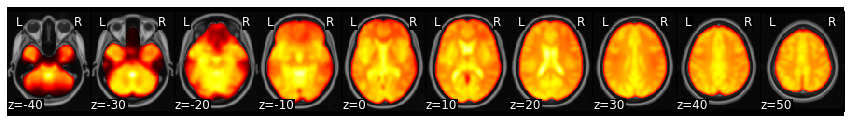

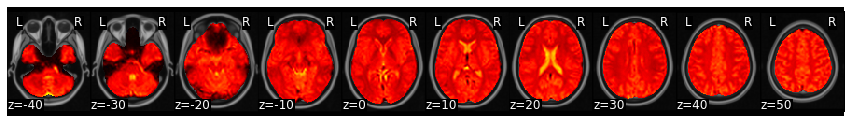

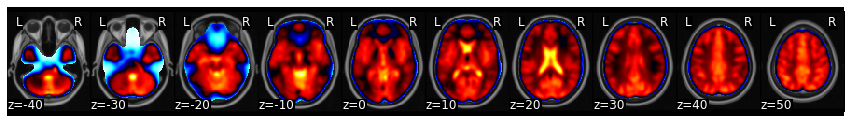

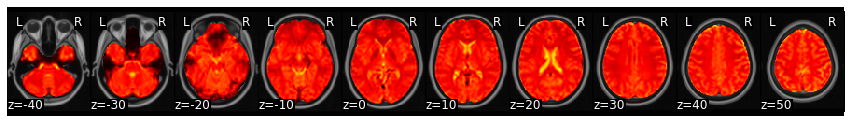

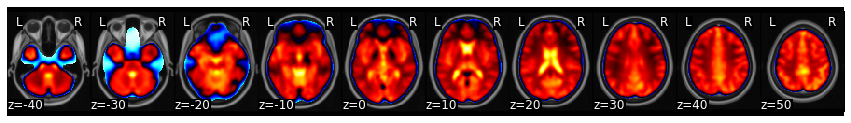

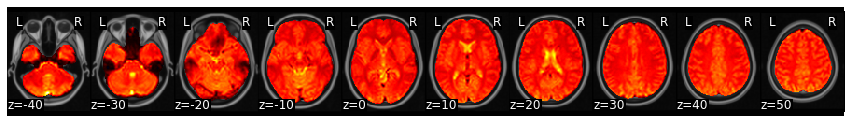

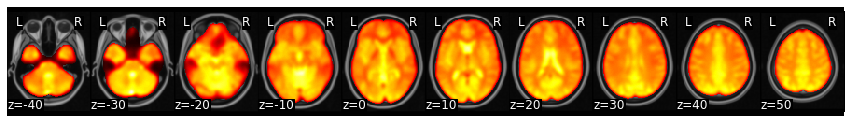

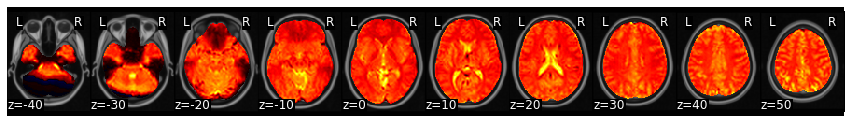

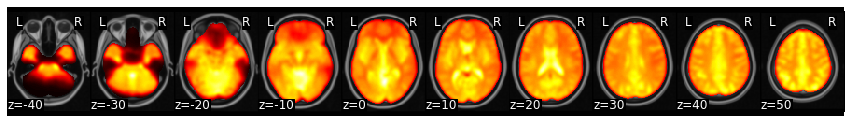

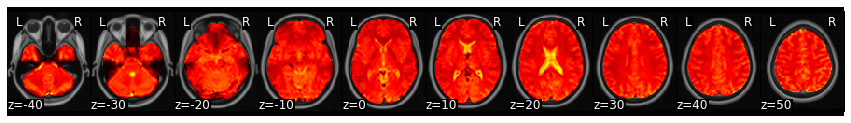

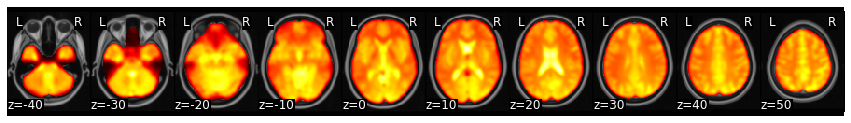

In [5]:
# start of the loop: 

ids = np.arange(184,217) # array of ppts ids 

for id in ids:
    id_str = f"{id:04d}" # change format to extract correct id 
    print(id_str)
    
    # search files in cor dirs
    image_name = glob.glob(os.path.join(data_dir, f"*{id_str}*.nii")) # extract the bold file corresponding to 
    image_name = ', '.join(image_name) #from list to string 
    print(image_name)
    
    if os.path.exists(image_name): # if path exists: 
        print('in loop')
        image_4d = image.load_img(image_name) # load in fmri file 
        print(image_4d.shape)
        n_tr = image_4d.shape[3] #this extracts the time points in the data
        
        # event file 
        event_file_name = glob.glob(os.path.join(event_dir, f"*{id_str}*.tsv"))
        event_file_name = ', '.join(event_file_name) # from list to string 
        print(event_file_name)
        event_file_path = os.path.join(event_dir, event_file_name)
        
        event_file_df  = pd.read_csv(event_file_path, sep="\t") #read event file into a dataframe
        
        # Resample the binary mask to match the fMRI image
        resampled_mask_img = image.resample_to_img(binary_mask_img, image_4d, interpolation='nearest')
        
        # even mask testen over dit specifiek brein
        # Select the tenth volume from the 4D image as the background image
        # brain_slice = index_img(image_4d, index=10)

        # Plot the single slice on top of the full brain image
        # plot_roi(resampled_mask_img, bg_img=brain_slice, title='Overlay on Slice')
        
        # apply mask on 4d image 
        # masked_data = masking.apply_mask(image_4d, resampled_mask_img)
        # print(masked_data.shape)
        
        # Conducting the spatial smoothing on the fMRI images
        data_image = Brain_Data(image_4d)

        #the width of the Gaussian kernel at half of its maximum height (larger FWHM means more extensive smoothing)
        data_image_smth = data_image.smooth(fwhm=fwhm) # the image after smoothing with a gaussian kernel
        
        data_image.mean().plot()
        data_image_smth.mean().plot()
        
        image_smth_name = 'sub-' + id_str +'_task-gstroop_smooth'
        data_image_smth.write(os.path.join(smooth_dir, image_smth_name))
        
        display(event_file_df)
        # filer out info relevant for fmri analysis 
        events = (event_file_df 
          .query('response_accuracy == "correct"') #filter out incorrect trials
          .loc[:,['onset', 'trial_type']] #selet columns
          .rename(columns={"onset": "Onset", "trial_type": "Stim"}) #rename
          )
        # filer out info relevant for behavioral analysis 
        events_RT = (event_file_df
                    .query('response_accuracy == "correct"') #filter out incorrect trials
                    .loc[:,['trial_type', 'response_time']]) #selet columns)
        print(events_RT)
        
        # BEHAVIORAL 
        # Calculating the means
        mean_incongruent = events_RT[events_RT["trial_type"] == "incongruent"]["response_time"].mean()
        mean_congruent = events_RT[events_RT["trial_type"] == "congruent"]["response_time"].mean()

        # Calculating the contrast
        contrast = mean_incongruent - mean_congruent

        # Creating the result DataFrame
        RTs_subject = pd.DataFrame({
            "subject": [id],
            "mean_incongruent": [mean_incongruent],
            "mean_congruent": [mean_congruent],
            "contrast": [contrast]
        })
        
        rt_df = pd.concat([rt_df, RTs_subject], ignore_index=True)
        print(rt_df)
        
        design_mat = onsets_to_dm(events, sampling_freq=1/tr, run_length=n_tr) # converts the df to a design matrix
        #he event onsets are binned into time bins based on the sampling frequency. Each bin corresponds to a time point in the design matrix.
        #For each time bin, the design matrix indicates whether an event of interest occurred at that time point. 
        #Each column in the design matrix typically represents a different condition or regressor.
        #Attention here! this is influenced by the TR
        # design_mat.info()
        
        #some visualization of the design matrix here
        # f,a = plt.subplots(figsize=(20,3))
        # design_mat.plot(ax=a) # show the onset of two conditions together across the scans
        # design_mat.heatmap()  # show the onset of two conditions separately side by side
        
        design_mat_conv = design_mat.convolve() #convolution with HRF function
        
        # Let's visualize the convolution result
        # design_mat_conv.heatmap() # Convolved onsets separately for each condition

        # f,a = plt.subplots(figsize=(15,3))
        # design_mat_conv['congruent_c0'].plot(ax=a) # Convolved onsets only for congruent condition
        #after convolution the conditions receive the ending c0

        # f,a = plt.subplots(figsize=(15,3))
        # design_mat_conv[['congruent_c0','incongruent_c0']].plot(ax=a) # Convolved onsets for both congruent and incongruent condition
        
        # Add intercept regressor
        design_mat_conv_poly = design_mat_conv.add_poly()
        # design_mat_conv_poly.heatmap()
        
        data_image_smth.X = design_mat_conv_poly
        results_flm = data_image_smth.regress()
        
        # Print the shapes of the design matrix and fMRI data
        # print("Shape of design matrix (design_mat_conv_poly):", design_mat_conv_poly.shape)
        # print("Shape of fMRI data (data_image_smth.data):", data_image_smth.data.shape)
        
        # Let's check out the structure of the modeling result
        # print(results_flm.keys()) # the estimates for all the predictors
        # print(data_image_smth.X.columns) # all the predictors included in the model, you should be able to recognize them
        
        # first we need to see which predictors we want to contrast
        # print(data_image_smth.X.columns)

        # defining the contrast
        c1 = np.zeros(len(results_flm['beta']))
        c1[[0]] = -1
        c1[[1]] = 1
        print(c1)
        
        # applying the contrast and plot the result
        control = results_flm['beta'] * c1
        # print(control.shape)
        
        #control.iplot()
        
        # make data from resampled mask
        mask_resampled_data = resampled_mask_img.get_fdata()

        # Reshape the mask data array to a 1D array
        mask_1d = mask_resampled_data.ravel()

        # Get the indices where mask values are 1 (inside the mask), these are the amygdala voxels
        # So what we want is to extract these voxels from the control frame, because this is the amygdala activation
        mask_indices = np.where(mask_1d == 1)[0]
        
        control_data = control.data 

        amygdala_contrast_values = control_data[mask_indices]
        
        np.mean(amygdala_contrast_values)
        
        # Convert the array to a pandas DataFrame
        contrast_df = pd.DataFrame(amygdala_contrast_values, columns=['Contrast_Values'])

        # Save the DataFrame to a CSV file
        contrasts_amygdala_file = 'sub-' + id_str +'_amygdala_contrast_values.csv'
        contrasts_amygdala_path = contrasts_amygdala_dir + contrasts_amygdala_file
        contrast_df.to_csv(contrasts_amygdala_path, index=False)
        
        print('gelukt! :)')

In [6]:
rt_df.to_csv("C:/fmridata/rt_df.csv", index=False) # change "C:/fmridata/rt_df.csv" to chosen path + file name + .csv